In [2]:
# !wget https://zenodo.org/record/1471626/files/Wheat_Ears_Detection_Dataset.zip
# !unzip Wheat_Ears_Detection_Dataset.zip -d ./

In [3]:
path = 'Wheat_Ears_Detection_Dataset/'

In [4]:
import os
from tqdm.auto import tqdm
import xmltodict
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [5]:
xml_files = [row for row in os.listdir(path) if row.split(".")[-1]=="xml"]
df_list = []
for xml_file in tqdm(xml_files):
    with open(os.path.join(path,xml_file)) as fd:
        doc = xmltodict.parse(fd.read())
    bboxes =[]
    for ann in doc['annotation']['object']:
        bbox = ann['bndbox']
        xmin,ymin,xmax,ymax = bbox['xmin'],bbox['ymin'],bbox['xmax'],bbox['ymax']
        bboxes.append([xmin,ymin,xmax,ymax])
    df_bbox = pd.DataFrame(np.array(bboxes).astype(int),columns=['x','y','xmax','ymax'])
    df_bbox['image_id'] = xml_file.replace(".xml","")
    df_bbox['source'] = "Ears"
    df_bbox['w'] = df_bbox['xmax'] - df_bbox['x']
    df_bbox['h'] = df_bbox['ymax'] - df_bbox['y']
    df_bbox = df_bbox[["image_id",'x','y','w','h','source']]
    df_list.append(df_bbox)
df = pd.concat(df_list)
df.to_csv("Wheat_Ears.csv",index=False)

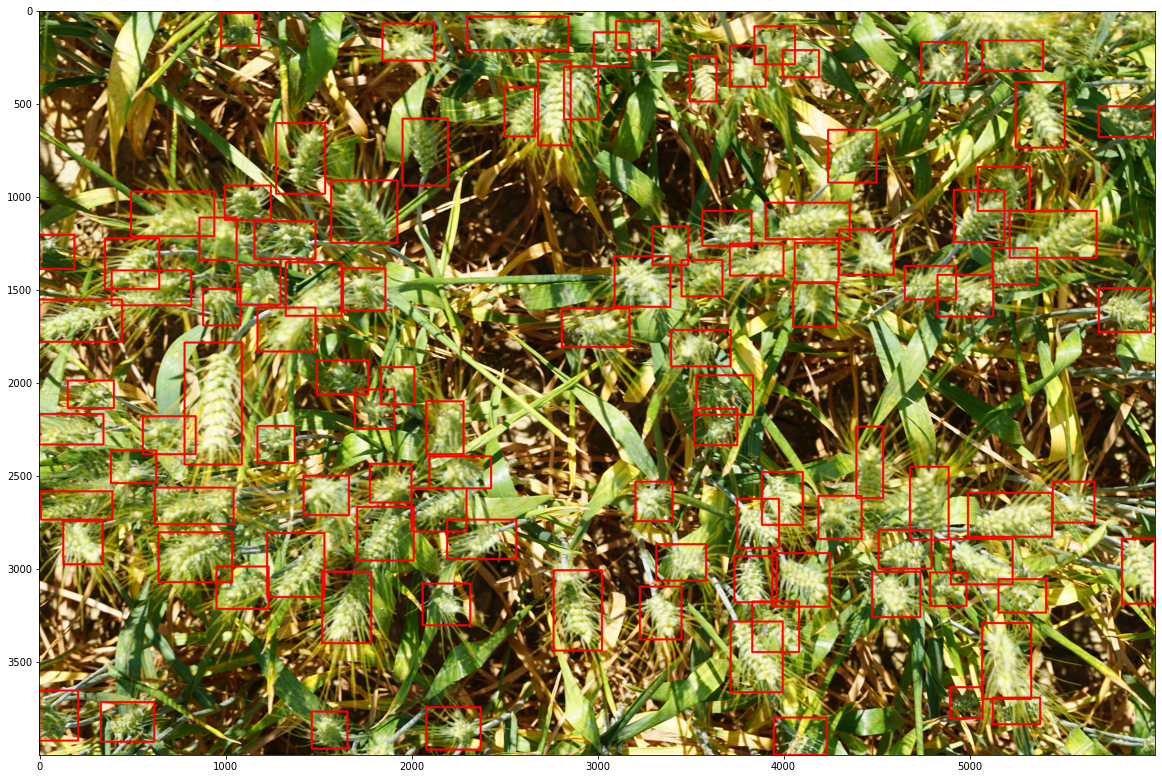

In [12]:
index = list(set(df.image_id))
ids = index[np.random.randint(len(index)-1)]
boxes = df[df.image_id==ids][['x','y','w','h']].values
img = plt.imread(path+"{}.JPG".format(ids))
plt.figure(figsize=[20,20])
for box in boxes:
    cv2.rectangle(img, (box[0], box[1]), (box[0]+box[2], box[1]+box[3]), (255, 0, 0), 10)
plt.imshow(img)
plt.show()